In [1]:
u1 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip"
u2 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip"
u3 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip"
u4 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip"
u5 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip"

In [2]:
import wget

In [3]:
wget.download(u1)
wget.download(u2)
wget.download(u3)
wget.download(u4)
wget.download(u5)

'S.zip'

In [4]:
! mkdir A2 
! mkdir B2
! mkdir C2
! mkdir D2
! mkdir E2

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile("Z.zip", "r") as z_ref:
    z_ref.extractall(r"A2")
with zipfile.ZipFile("N.zip", "r") as n_ref:
    n_ref.extractall(r"B2")
with zipfile.ZipFile("O.zip", "r") as o_ref:
    o_ref.extractall(r"C2")
with zipfile.ZipFile("F.zip", "r") as f_ref:
    f_ref.extractall(r"D2")
with zipfile.ZipFile("S.zip", "r") as s_ref:
    s_ref.extractall(r"E2")

In [7]:
import numpy as np
import os
from scipy.signal import butter, filtfilt


pass_band = [0.5*2/173, 40*2/173]
b, a = butter(1, pass_band, 'bandpass')

A_files = [os.path.join(r"A2", path) for path in os.listdir(r"A2")]

A_signals = []

for signal in A_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  A_signals.append(signal)

A_signals = np.array(A_signals)

In [8]:
B_files = [os.path.join(r"B2", path) for path in os.listdir(r"B2")]

B_signals = []

for signal in B_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  B_signals.append(signal)

B_signals = np.array(B_signals)

In [9]:
C_files = [os.path.join(r"C2", path) for path in os.listdir(r"C2")]

C_signals = []


for signal in C_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  C_signals.append(signal)

C_signals = np.array(C_signals)

In [10]:
D_files = [os.path.join(r"D2", path) for path in os.listdir(r"D2")]

D_signals = []


for signal in D_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  D_signals.append(signal)

D_signals = np.array(D_signals)

In [11]:
E_files = [os.path.join(r"E2", path) for path in os.listdir(r"E2")]

E_signals = []


for signal in E_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  E_signals.append(signal)

E_signals = np.array(E_signals)

In [12]:
# 1: Normal EEG Signals
# 2: Seizure EEG Signals
import numpy as np
A_labels = np.ones(len(A_signals)) * 1
B_labels = np.ones(len(B_signals)) * 1

C_labels = np.ones(len(C_signals)) * 1
D_labels = np.ones(len(D_signals)) * 1

E_labels = np.ones(len(E_signals)) * 2

X = np.concatenate((A_signals, B_signals, C_signals), axis=0)
Y = np.concatenate((A_labels, B_labels, C_labels), axis=0)
X2 = E_signals
Y2 = E_labels

from sklearn.preprocessing import LabelBinarizer

Y = LabelBinarizer().fit_transform(Y)
Y2 = LabelBinarizer().fit_transform(Y2)
print(X.shape)
print(Y.shape)

(300, 4097)
(300, 1)


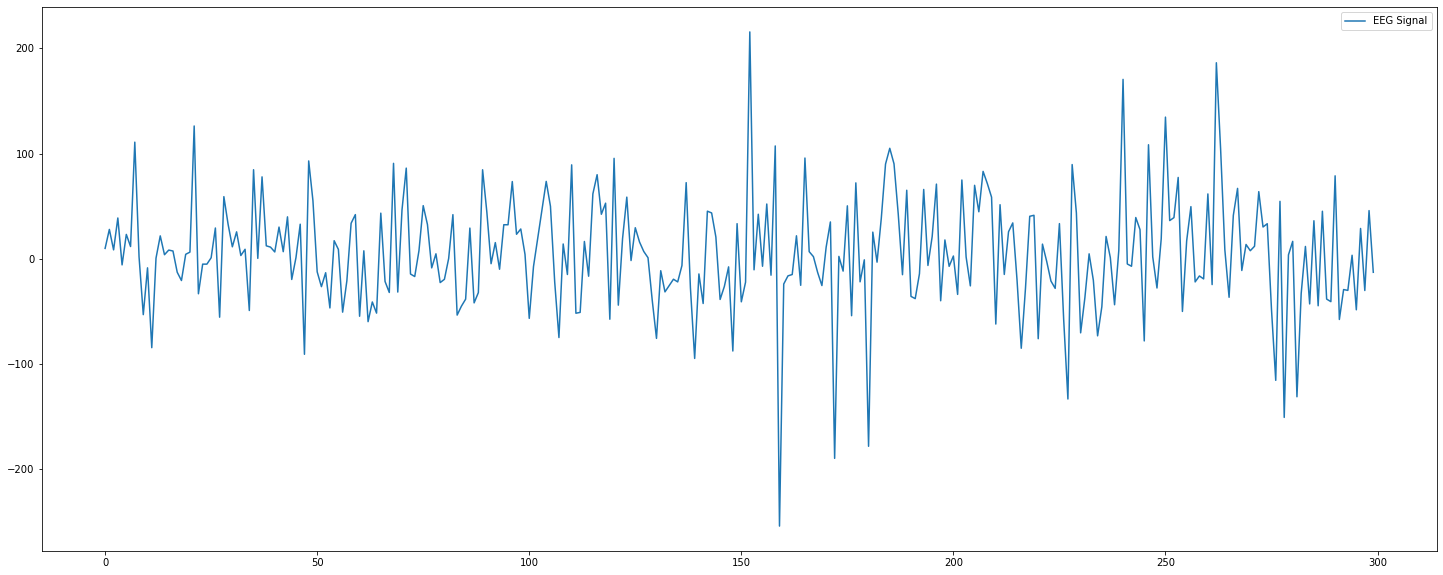

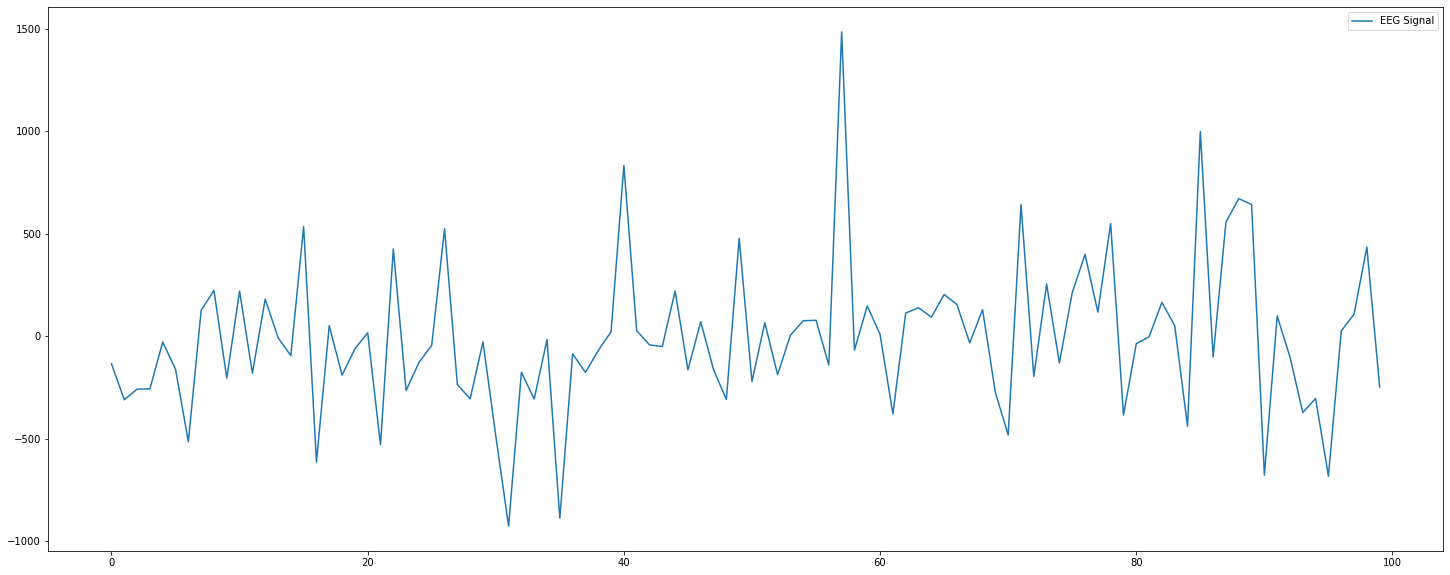

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 10))
plt.plot(X[0:499, 50],  label = 'EEG Signal')
plt.legend()

plt.figure(figsize=(25, 10))
plt.plot(X2[0:150,5],  label = 'EEG Signal')
plt.legend()

In [14]:
X = X[:, 0:868].reshape(-1, 868, 1)
X2 = X2[:, 0:868].reshape(-1, 868, 1)
print(X.shape)
print(Y.shape)
print(X2.shape)
print(Y2.shape)

(300, 868, 1)
(300, 1)
(100, 868, 1)
(100, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, 868)).reshape(-1, 868, 1)
X2 = scaler.fit_transform(X2.reshape(-1, 868)).reshape(-1, 868, 1)
print(X.shape)
print(X2.shape)
print(X[1].shape)

(300, 868, 1)
(100, 868, 1)
(868, 1)


In [16]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, UpSampling1D, Activation
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inputs = Input(shape=(868, 1))
# ENCODER
# part 1
x = Conv1D(32, 7, padding='same', strides=1)(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)
x = Dropout(0.5)(x)
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4, name='encoder_out')(x)

# DECODER
# part 2
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = ZeroPadding1D(padding=2)(x)
x = Conv1D(1, 7, padding='same', strides=1)(x)
x = Activation('tanh')(x)

model= Model(inputs, x)


You should consider upgrading via the '/Users/jcervan/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [17]:
from sklearn.model_selection import train_test_split

ADX_test, ADY_test = X2, Y2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42,
                                                    shuffle=True,
                                                    stratify=np.concatenate((A_labels, B_labels, C_labels), axis=0))
print(X_train.shape)
print(X_test.shape)
print(ADX_test.shape)

(270, 868, 1)
(30, 868, 1)
(100, 868, 1)


In [18]:
model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, X_train, validation_data=(X_test, X_test),
                    epochs=1500, batch_size=40)

Epoch 1/1500
7/7 [==============================] - 5s 120ms/step - loss: 0.4934 - val_loss: 0.0945
Epoch 2/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.4909 - val_loss: 0.0952
Epoch 3/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.4892 - val_loss: 0.0955
Epoch 4/1500
7/7 [==============================] - 1s 72ms/step - loss: 0.4865 - val_loss: 0.0959
Epoch 5/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.4847 - val_loss: 0.0964
Epoch 6/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.4841 - val_loss: 0.0971
Epoch 7/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.4864 - val_loss: 0.0979
Epoch 8/1500
7/7 [==============================] - 1s 71ms/step - loss: 0.4832 - val_loss: 0.0989
Epoch 9/1500
7/7 [==============================] - 1s 72ms/step - loss: 0.4804 - val_loss: 0.1001
Epoch 10/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.4872 - val_loss: 0.1013
Epoch 11

In [45]:
MODEL_PATH = 'EEG_AE.h5'
model.save(MODEL_PATH)

In [46]:
from tensorflow import keras
model = keras.models.load_model('EEG_AE.h5')

In [ ]:
model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, X_train, validation_data=(X_test, X_test),
                    epochs=1500, batch_size=40)

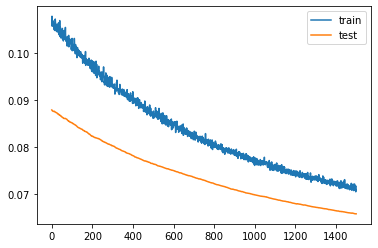

In [48]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

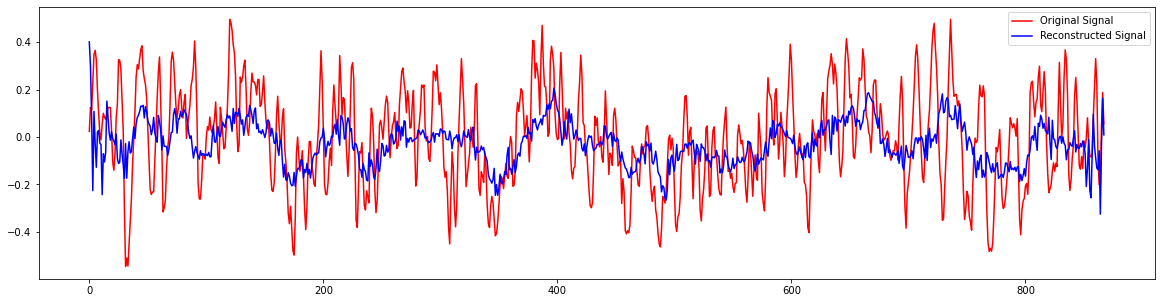

In [49]:
import numpy as np

preds = model.predict(X_test)
plt.figure(figsize=(20, 5))
plt.plot(X_test[3], color='red',label = 'Original Signal')
plt.plot(preds[3], color='blue',  label = 'Reconstructed Signal')
plt.legend()


In [50]:
import pandas as pd
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(train_pred.shape[0], train_pred.shape[1])
origin_data = X_train.reshape(X_train.shape[0],X_train.shape[1])
print(train_pred.shape)
print(origin_data.shape)

(270, 868)
(270, 868)


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


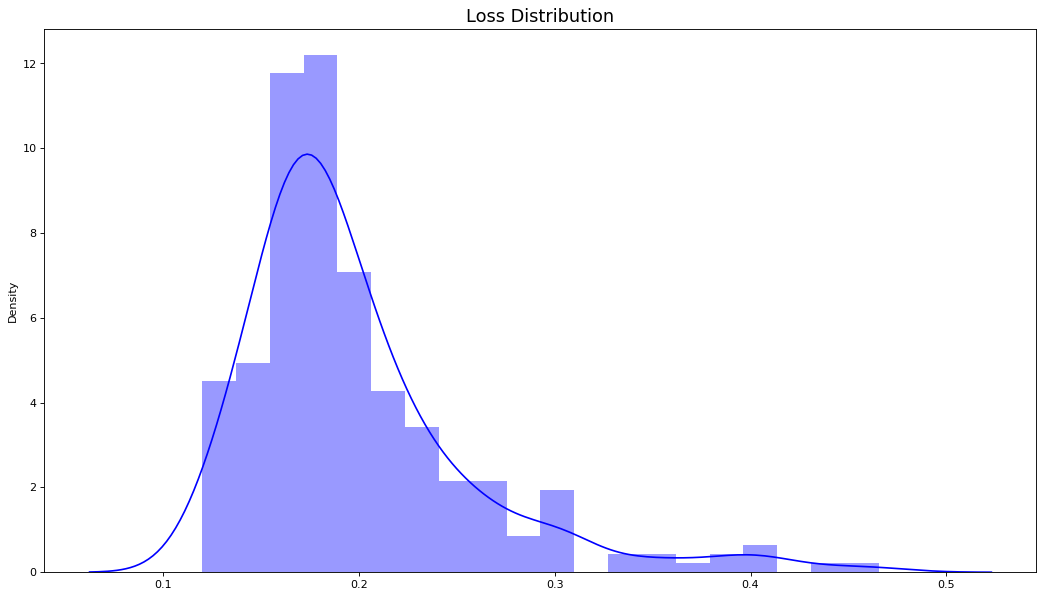

In [51]:
import numpy as np
import seaborn as sns
scored = pd.DataFrame()

scored['loss_mae'] = np.mean(np.abs(train_pred - origin_data), axis = 1)

pred_losses = scored.to_numpy()

plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(pred_losses, bins = 20, kde=True, color = 'blue');

In [52]:
threshold = .3

In [53]:
correct = sum(l <= threshold for l in pred_losses)
print(f'Correct normal predictions: {int(correct)}/{len(origin_data)}')

Correct normal predictions: 250/270


In [54]:
test_pred = model.predict(X_test)
test_pred = test_pred.reshape(test_pred.shape[0], test_pred.shape[1])
test_data = X_test.reshape(X_test.shape[0],X_test.shape[1])

/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


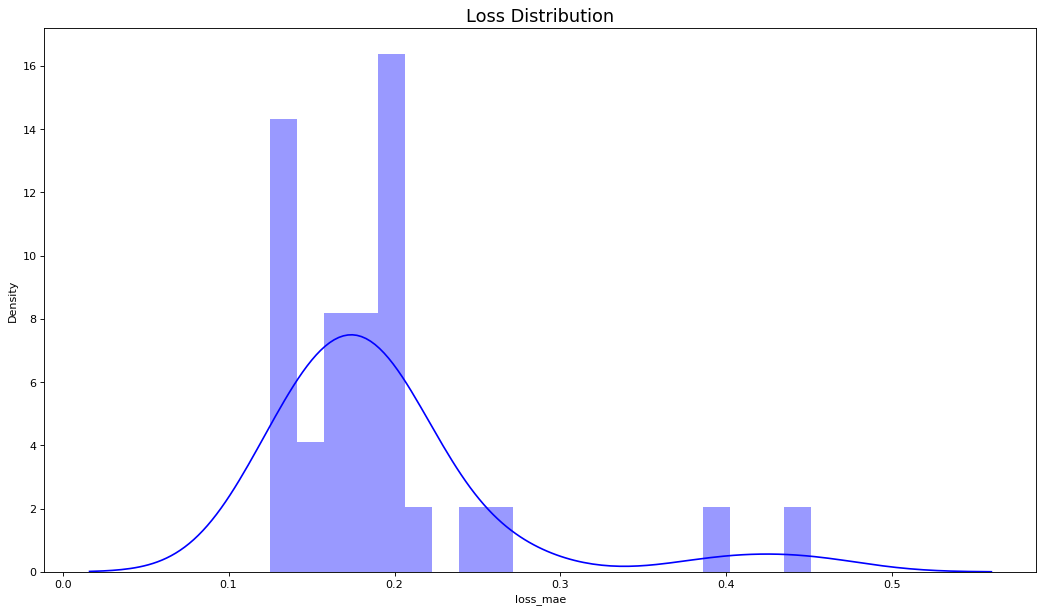

In [55]:
scored = pd.DataFrame()
scored['loss_mae'] = np.mean(np.abs(test_pred - test_data), axis = 1)

test_pred_losses = scored.to_numpy()

plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(scored['loss_mae'], bins = 20, kde=True, color = 'blue');

In [56]:
correct = sum(l <= threshold for l in test_pred_losses)
print(f'Correct normal predictions: {int(correct)}/{len(test_data)}')

Correct normal predictions: 28/30


In [57]:
anom_pred = model.predict(ADX_test)
anom_pred = anom_pred.reshape(anom_pred.shape[0], anom_pred.shape[1])
anom_data = ADX_test.reshape(ADX_test.shape[0],ADX_test.shape[1])

/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


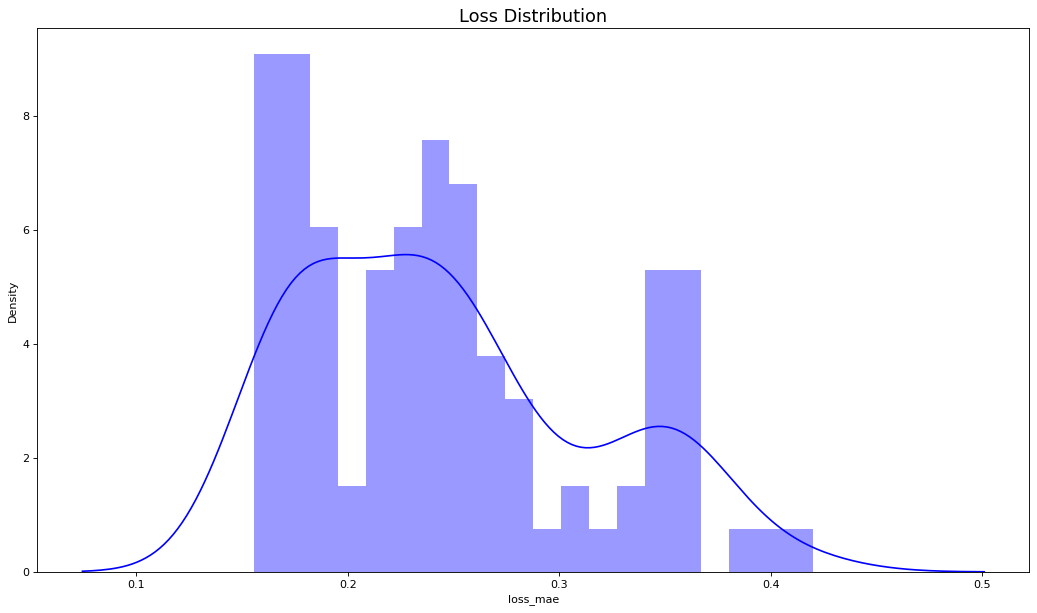

In [58]:
scored = pd.DataFrame()

scored['loss_mae'] = np.mean(np.abs(anom_pred - anom_data), axis = 1)

anom_pred_losses = scored.to_numpy()

plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(scored['loss_mae'], bins = 20, kde=True, color = 'blue');

In [59]:
correct = sum(l > threshold for l in anom_pred_losses)
print(f'Correct anomaly predictions: {int(correct)}/{len(anom_data)}')

Correct anomaly predictions: 22/100


In [60]:
def mae_loss(dataset):
    
    predicted = model.predict(dataset)
    predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])
    dataset = dataset.reshape(dataset.shape[0],dataset.shape[1])
    
    
    scored = pd.DataFrame()

    scored['Pred_loss_mae'] = np.mean(np.abs(predicted - dataset), axis = 1)

    pred_losses = scored.to_numpy()
    
    return pred_losses

In [61]:
def mse_loss(dataset):
    
    predicted = model.predict(dataset)
    predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])
    dataset = dataset.reshape(dataset.shape[0],dataset.shape[1])
    
    
    scored = pd.DataFrame()

    scored['Pred_loss_mae'] = np.mean(np.square(predicted - dataset), axis = 1)

    pred_losses = scored.to_numpy()
    
    return pred_losses

In [62]:
def accuracy(data_loss, THRESHOLD):
    normal_predictions = sum(l <= THRESHOLD for l in data_loss)
    anomaly_predictions = sum(l > THRESHOLD for l in data_loss)
    
    print(f'normal predictions: {int(normal_predictions)}/{len(data_loss)}')
    print(f'anomaly predictions: {int(anomaly_predictions)}/{len(data_loss)}')

/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


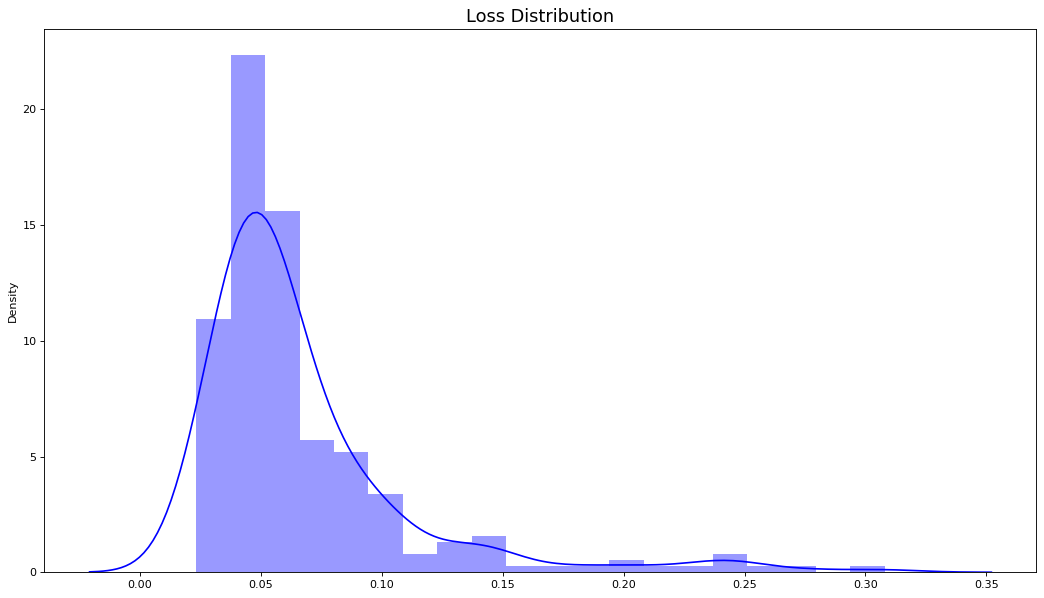

In [63]:
norm_l = mse_loss(origin_data)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(norm_l, bins = 20, kde=True, color = 'blue');

In [64]:
Thresh = .1

In [65]:
accuracy(norm_l,Thresh)

normal predictions: 233/270
anomaly predictions: 37/270


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


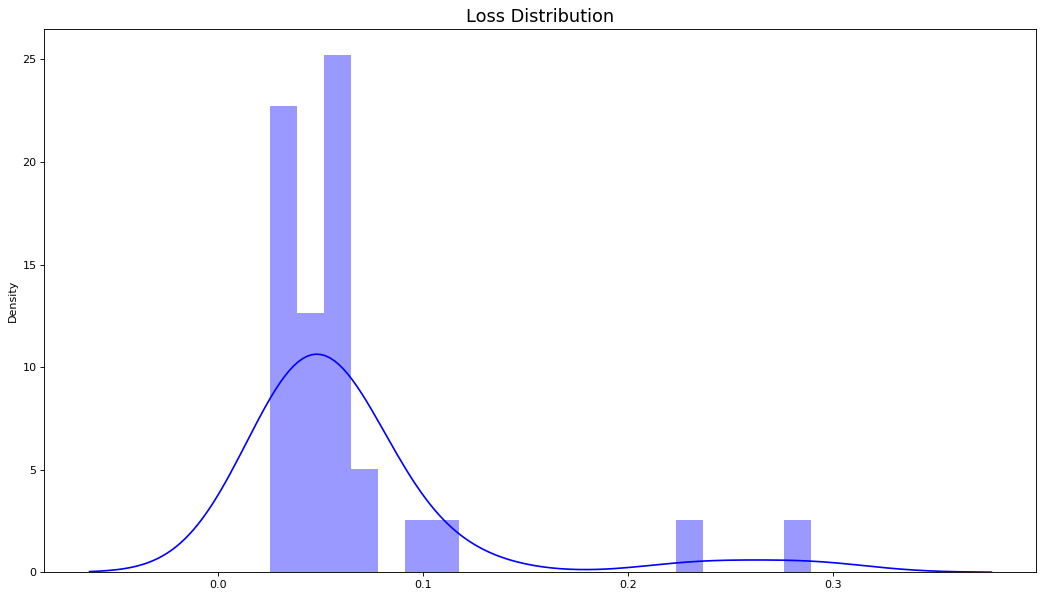

In [66]:
test_l = mse_loss(test_data)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(test_l, bins = 20, kde=True, color = 'blue');

In [67]:
accuracy(test_l,Thresh)

normal predictions: 27/30
anomaly predictions: 3/30


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


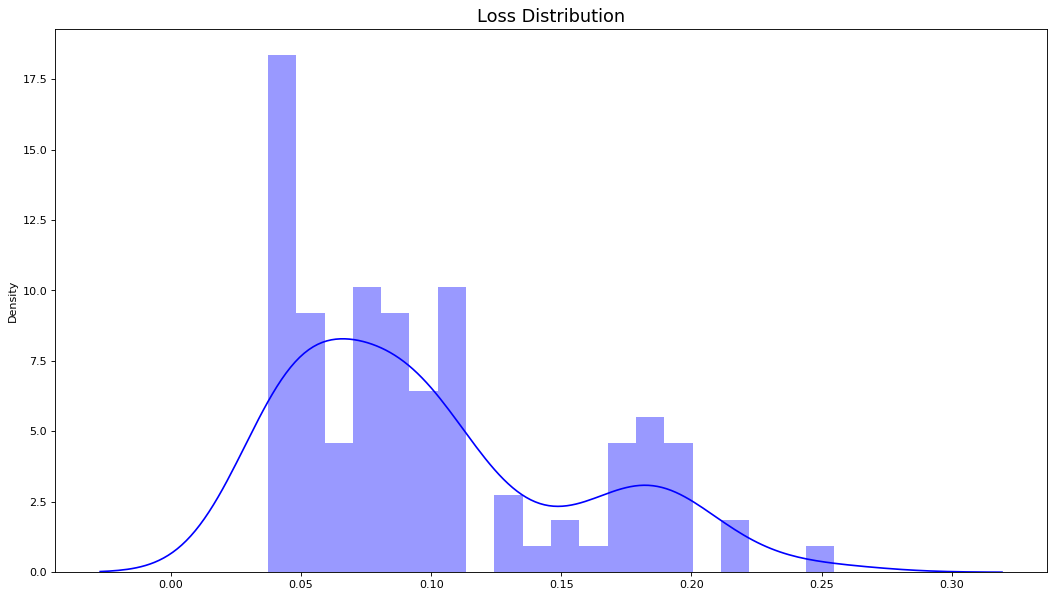

In [68]:
anom_l = mse_loss(anom_data)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(anom_l, bins = 20, kde=True, color = 'blue');

In [69]:
accuracy(anom_l,Thresh)

normal predictions: 63/100
anomaly predictions: 37/100


In [49]:
# import torch.nn as nn
# def RLoss(preds, dataset):
#     criterion = nn.L1Loss()
#     loss = criterion(preds, dataset)
#     return loss

In [40]:
# import torch.nn as nn

# def R_Loss(pred, dataset):
#     losses = []
#     criterion = nn.MSELoss()
#     for p in range(40):
        
#         loss = criterion(pred[p], dataset[p])
            
#         losses.append(loss.item())
#     return losses

In [53]:
# import torch
# preds = torch.tensor(model.predict(X_train))
# X_train = torch.tensor(X_train)
# preds.flatten(preds)
# X_train.flatten(X_train)
# losses = RLoss(preds, X_train)
# print(losses)

TypeError: flatten(): argument 'start_dim' (position 1) must be int, not Tensor

In [36]:
# import seaborn as sns
# sns.displot(losses, bins=50, kde=True);

ValueError: Data must be 1-dimensional

In [45]:
# losses = R_Loss(preds, X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [25]:
# model.save('Norm_EEG.pth')

INFO:tensorflow:Assets written to: Norm_EEG.pth/assets


In [34]:
# def prediction(model, dataset):
#     predictions, losses = [], []
#     criterion = nn.L1Loss(reduction = 'sum')
#     with torch.no_grad():
#         for i in dataset:
#             i_pred = model(i)
            
#             loss = criterion(i_pred, i)
            
#             predictions.append(i_pred.cpu().np().flatten())
#             losses.append(loss.item())
#     return predictions, losses

In [56]:
import torch
import torch.nn as nn
_, losses = R_Loss(model.predict(X_test), X_test)

TypeError: 'int' object is not callable